In [1]:
!nvidia-smi


Mon Nov 17 15:19:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os

BASE_DIR = "/content/semeval2026-task13"
os.makedirs(f"{BASE_DIR}/src", exist_ok=True)
os.makedirs(f"{BASE_DIR}/data", exist_ok=True)

os.listdir(BASE_DIR)


['data', 'src']

In [3]:
!pip install torch transformers pandas pyarrow scikit-learn tqdm


In [4]:
import os, pandas as pd

BASE_DIR = "/content/semeval2026-task13"
DATA_DIR = f"{BASE_DIR}/data"

print("Files in data/:", os.listdir(DATA_DIR))

a_train_path = f"{DATA_DIR}/task_a_training_set_1.parquet"
df_a_train = pd.read_parquet(a_train_path)

print("Task A train shape:", df_a_train.shape)
print("Task A train columns:", df_a_train.columns.tolist())
df_a_train.head(5)


Files in data/: ['task_a_validation_set.parquet', 'task_c_test_set_sample.parquet', 'task_b_validation_set.parquet', 'task_b_training_set.parquet', 'task_a_test_set_sample.parquet', 'task_c_validation_set.parquet', 'task_c_training_set_1.parquet', 'task_a_training_set_1.parquet', 'task_b_test_set_sample.parquet']
Task A train shape: (500000, 4)
Task A train columns: ['code', 'generator', 'label', 'language']


,code,generator,label,language
0,"(a, b, c, d) = [int(x) for x in input().split(...",human,0,Python
1,valid version for the language; all others can...,Qwen/Qwen2.5-Coder-1.5B,1,Python
2,python\ndef min_cards_to_flip(s):\n vowels ...,Qwen/Qwen2.5-Coder-7B-Instruct,1,Python
3,T = int(input())\nfor t in range(T):\n\tcolor ...,human,0,Python
4,for i in range(int(input())):\n\tinput()\n\ta ...,human,0,Python


In [5]:
import pandas as pd

BASE_DIR = "/content/semeval2026-task13"
DATA_DIR = f"{BASE_DIR}/data"

# Task B train
b_train_path = f"{DATA_DIR}/task_b_training_set.parquet"
df_b_train = pd.read_parquet(b_train_path)
print("Task B train shape:", df_b_train.shape)
print("Task B train columns:", df_b_train.columns.tolist())
print(df_b_train.head(3), "\n")

# Task C train
c_train_path = f"{DATA_DIR}/task_c_training_set_1.parquet"
df_c_train = pd.read_parquet(c_train_path)
print("Task C train shape:", df_c_train.shape)
print("Task C train columns:", df_c_train.columns.tolist())
print(df_c_train.head(3))


Task B train shape: (500000, 4)
Task B train columns: ['code', 'generator', 'label', 'language']
                                                code generator  label language
0  def load(config, filepath, token):\n    if con...     Human      0   Python
1  n = int(input())\narr = list(map(int, input()....     Human      0   Python
2  using Aow.Infrastructure.Domain;\nusing Aow.In...    GPT-4o     10       C# 

Task C train shape: (900000, 4)
Task C train columns: ['code', 'generator', 'label', 'language']
                                                code               generator  \
0  import React, { useState, useEffect } from 're...                  GPT-4o   
1  <?php\n\nuse Fedeisas\LaravelJsRoutes\Commands...                   Human   
2  const math = require('mathjs');\n\n/**\n * Cal...  google/codegemma-7b-it   

   label    language  
0      1  JavaScript  
1      0         PHP  
2      1  JavaScript  


In [6]:
import pandas as pd
import numpy as np

#CRETING BALANCES SUBSETS FOR A B AND C
BASE = "/content/semeval2026-task13"
DATA = f"{BASE}/data"

def make_balanced_subset(df, n_samples):
    # sample equally per class
    labels = df['label'].unique()
    per_label = n_samples // len(labels)
    out = []

    for lab in labels:
        df_lab = df[df['label'] == lab]
        take = min(per_label, len(df_lab))
        out.append(df_lab.sample(n=take, random_state=42))

    result = pd.concat(out).sample(frac=1, random_state=42)
    return result


### -------- Task A --------
df_a_train = pd.read_parquet(f"{DATA}/task_a_training_set_1.parquet")
df_a_val   = pd.read_parquet(f"{DATA}/task_a_validation_set.parquet")

a_train_small = make_balanced_subset(df_a_train, 20000)
a_val_small   = make_balanced_subset(df_a_val,   5000)

a_train_small.to_csv(f"{DATA}/task_a_train_small.csv", index=False)
a_val_small.to_csv(f"{DATA}/task_a_val_small.csv", index=False)


### -------- Task B --------
df_b_train = pd.read_parquet(f"{DATA}/task_b_training_set.parquet")
df_b_val   = pd.read_parquet(f"{DATA}/task_b_validation_set.parquet")

b_train_small = make_balanced_subset(df_b_train, 20000)
b_val_small   = make_balanced_subset(df_b_val,   5000)

b_train_small.to_csv(f"{DATA}/task_b_train_small.csv", index=False)
b_val_small.to_csv(f"{DATA}/task_b_val_small.csv", index=False)


### -------- Task C --------
df_c_train = pd.read_parquet(f"{DATA}/task_c_training_set_1.parquet")
df_c_val   = pd.read_parquet(f"{DATA}/task_c_validation_set.parquet")

c_train_small = make_balanced_subset(df_c_train, 20000)
c_val_small   = make_balanced_subset(df_c_val,   5000)

c_train_small.to_csv(f"{DATA}/task_c_train_small.csv", index=False)
c_val_small.to_csv(f"{DATA}/task_c_val_small.csv", index=False)

print("A small shapes:", a_train_small.shape, a_val_small.shape)
print("B small shapes:", b_train_small.shape, b_val_small.shape)
print("C small shapes:", c_train_small.shape, c_val_small.shape)


A small shapes: (20000, 4) (5000, 4)
B small shapes: (19998, 4) (4903, 4)
C small shapes: (20000, 4) (5000, 4)


In [7]:
%%writefile /content/semeval2026-task13/src/dataset.py
import pandas as pd
import torch
from torch.utils.data import Dataset

class CodeDataset(Dataset):
    def __init__(self, csv_path, tokenizer, max_length=256):

        self.df = pd.read_csv(csv_path)

        # Store tokenizer and config
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Ensure required columns exist
        required_cols = {"code", "label"}
        missing = required_cols - set(self.df.columns)
        if missing:
            raise ValueError(f"Missing columns in {csv_path}: {missing}")

    def __len__(self):
        # Return the total number of samples
        return len(self.df)

    def __getitem__(self, idx):
        # Extract a single row by index
        row = self.df.iloc[idx]

        # Convert code snippet to string and label to integer
        code = str(row["code"])
        label = int(row["label"])

        # Tokenize the code text (convert to input_ids, attention_mask, etc.)
        enc = self.tokenizer(
            code,
            truncation=True,           # Cut off long sequences
            max_length=self.max_length,
            padding="max_length",      # Pad shorter sequences to max_length
            return_tensors="pt"        # Return PyTorch tensors
        )

        # Remove batch dimension added by tokenizer (squeeze from [1, X] → [X])
        item = {k: v.squeeze(0) for k, v in enc.items()}

        # Add label tensor (as required by transformers Trainer)
        item["labels"] = torch.tensor(label, dtype=torch.long)

        return item


Writing /content/semeval2026-task13/src/dataset.py


In [8]:
%%writefile /content/semeval2026-task13/src/model.py
import torch.nn as nn
from transformers import AutoModel

class CodeClassifier(nn.Module):
    def __init__(self, model_name="microsoft/codebert-base", num_labels=2, dropout=0.1):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)  # Load transformer encoder
        hidden_size = self.encoder.config.hidden_size         # Encoder output dimension
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(hidden_size, num_labels)  # Classification head

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        cls = outputs.last_hidden_state[:, 0, :]  # Use [CLS] token representation
        x = self.dropout(cls)
        logits = self.classifier(x)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()      # Standard classification loss
            loss = loss_fct(logits, labels)

        return {"loss": loss, "logits": logits}


Writing /content/semeval2026-task13/src/model.py


In [9]:
%%writefile /content/semeval2026-task13/src/train_task.py
import argparse
import os

import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, get_linear_schedule_with_warmup
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score

from dataset import CodeDataset
from model import CodeClassifier


def train_one_epoch(model, dataloader, optimizer, scheduler, device):
    model.train()  # Set model to training mode
    total_loss = 0.0

    for batch in tqdm(dataloader, desc="Train"):
        batch = {k: v.to(device) for k, v in batch.items()}  # Move data to device (GPU/CPU)
        optimizer.zero_grad()  # Reset gradients

        outputs = model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            labels=batch["labels"],
        )
        loss = outputs["loss"]
        loss.backward()  # Compute gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()  # Update model weights
        if scheduler is not None:
            scheduler.step()  # Update learning rate with scheduler

        total_loss += loss.item()  # Accumulate loss for the epoch

    return total_loss / len(dataloader)  # Return average loss for the epoch


@torch.no_grad()
def eval_epoch(model, dataloader, device):
    model.eval()  # Set model to evaluation mode
    all_labels = []
    all_preds = []

    for batch in tqdm(dataloader, desc="Eval"):
        batch = {k: v.to(device) for k, v in batch.items()}  # Move data to device
        outputs = model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
        )
        logits = outputs["logits"]
        preds = torch.argmax(logits, dim=-1)  # Get predicted class labels

        all_preds.extend(preds.cpu().numpy())  # Store predictions
        all_labels.extend(batch["labels"].cpu().numpy())  # Store true labels

    # Calculate evaluation metrics (accuracy and F1 score)
    acc = accuracy_score(all_labels, all_preds)
    f1_macro = f1_score(all_labels, all_preds, average="macro")
    return {"acc": acc, "f1_macro": f1_macro}


def main(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Choose device
    print("Using device:", device)

    tokenizer = AutoTokenizer.from_pretrained(args.model_name)  # Load tokenizer for chosen model
    train_ds = CodeDataset(args.train_path, tokenizer, max_length=args.max_length)  # Load training data
    val_ds = CodeDataset(args.val_path, tokenizer, max_length=args.max_length)  # Load validation data

    num_labels = int(train_ds.df["label"].nunique())  # Get number of unique labels
    print(f"Detected num_labels = {num_labels}")

    train_loader = DataLoader(train_ds, batch_size=args.batch_size, shuffle=True)  # Train DataLoader
    val_loader = DataLoader(val_ds, batch_size=args.batch_size, shuffle=False)  # Validation DataLoader

    model = CodeClassifier(
        model_name=args.model_name,
        num_labels=num_labels,
        dropout=args.dropout,
    )
    model.to(device)  # Move model to device (GPU/CPU)

    optimizer = torch.optim.AdamW(model.parameters(), lr=args.lr)  # Optimizer
    total_steps = len(train_loader) * args.epochs  # Total number of training steps
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(0.1 * total_steps),  # 10% warmup steps
        num_training_steps=total_steps,
    )

    best_f1 = 0.0  # Initialize best F1 score tracker
    os.makedirs(args.out_dir, exist_ok=True)  # Create output directory if it doesn't exist

    # Training loop over epochs
    for epoch in range(1, args.epochs + 1):
        print(f"\nEpoch {epoch}/{args.epochs}")
        train_loss = train_one_epoch(model, train_loader, optimizer, scheduler, device)  # Train for one epoch
        print(f"Train loss: {train_loss:.4f}")

        metrics = eval_epoch(model, val_loader, device)  # Evaluate on validation data
        print(f"Val metrics: {metrics}")

        # Save the best model based on F1 score
        if metrics["f1_macro"] > best_f1:
            best_f1 = metrics["f1_macro"]
            ckpt_path = os.path.join(args.out_dir, f"best_model_{args.task_name}.pt")
            torch.save(
                {
                    "model_state_dict": model.state_dict(),
                    "model_name": args.model_name,
                    "num_labels": num_labels,
                    "max_length": args.max_length,
                    "val_metrics": metrics,
                },
                ckpt_path,
            )
            print("Saved new best model to", ckpt_path)


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    # Define arguments for training configuration
    parser.add_argument("--task_name", type=str, default="task_a")
    parser.add_argument("--train_path", type=str, required=True)
    parser.add_argument("--val_path", type=str, required=True)
    parser.add_argument("--model_name", type=str, default="microsoft/codebert-base")
    parser.add_argument("--max_length", type=int, default=256)
    parser.add_argument("--batch_size", type=int, default=8)
    parser.add_argument("--epochs", type=int, default=1)
    parser.add_argument("--lr", type=float, default=2e-5)
    parser.add_argument("--dropout", type=float, default=0.1)
    parser.add_argument("--out_dir", type=str, default="/content/semeval2026-task13/checkpoints")
    args = parser.parse_args()
    main(args)  # Run the training process


Writing /content/semeval2026-task13/src/train_task.py


In [10]:
%%writefile /content/semeval2026-task13/src/predict_task.py
import argparse
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from tqdm import tqdm

from dataset import CodeDataset
from model import CodeClassifier


@torch.no_grad()
def main(args):
    # Choose device (GPU if available, otherwise CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load model checkpoint
    ckpt = torch.load(args.checkpoint, map_location=device)

    # Extract model configuration from checkpoint
    model_name = ckpt["model_name"]
    num_labels = ckpt["num_labels"]
    max_length = ckpt["max_length"]

    # Load tokenizer associated with the model
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Load test data (supports both CSV and Parquet formats)
    df_test = pd.read_parquet(args.test_path) if args.test_path.endswith(".parquet") else pd.read_csv(args.test_path)

    # Save a copy of the original data (for later use, e.g., preserving ids)
    df_orig = df_test.copy()

    # Add dummy 'label' column if it does not exist (useful for models that expect labels during prediction)
    if "label" not in df_test.columns:
        df_test["label"] = 0

    # Save the test data temporarily (with dummy label) for use in the dataset
    tmp_path = "/content/semeval2026-task13/data/tmp_test_with_label.csv"
    df_test.to_csv(tmp_path, index=False)

    # Initialize dataset and DataLoader for test set
    test_ds = CodeDataset(tmp_path, tokenizer, max_length=max_length)
    loader = DataLoader(test_ds, batch_size=args.batch_size, shuffle=False)

    # Initialize the model and load the saved state dictionary
    model = CodeClassifier(model_name=model_name, num_labels=num_labels)
    model.load_state_dict(ckpt["model_state_dict"])
    model.to(device)
    model.eval()  # Set model to evaluation mode

    # List to store predictions
    preds = []

    # Make predictions in batches
    for batch in tqdm(loader, desc="Predict"):
        batch = {k: v.to(device) for k, v in batch.items()}  # Move data to device
        labels = batch.pop("labels")  # Ignore label column in test data
        outputs = model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
        )
        logits = outputs["logits"]
        batch_preds = torch.argmax(logits, dim=-1).cpu().numpy()  # Get predicted class labels
        preds.extend(batch_preds)  # Collect predictions

    # Add predictions to original dataframe
    df_out = df_orig.copy()
    df_out["pred_label"] = preds

    # Save predictions to output path
    os.makedirs(os.path.dirname(args.output_path) or ".", exist_ok=True)
    df_out.to_csv(args.output_path, index=False)
    print("Saved predictions to", args.output_path)


if __name__ == "__main__":
    # Argument parsing for command-line interface
    p = argparse.ArgumentParser()
    p.add_argument("--checkpoint", type=str, required=True)  # Path to saved model checkpoint
    p.add_argument("--test_path", type=str, required=True)  # Path to test data (CSV/Parquet)
    p.add_argument("--batch_size", type=int, default=8)  # Batch size for prediction
    p.add_argument("--output_path", type=str, default="predictions.csv")  # Output path for predictions
    args = p.parse_args()
    main(args)  # Run the prediction process


Writing /content/semeval2026-task13/src/predict_task.py


In [11]:
import os
os.listdir("/content/semeval2026-task13/src")


['model.py', 'dataset.py', 'predict_task.py', 'train_task.py']

In [12]:
# TRAIN A ON SMALL SET
%cd /content/semeval2026-task13/src

!python train_task.py \
  --task_name task_a \
  --train_path /content/semeval2026-task13/data/task_a_train_small.csv \
  --val_path /content/semeval2026-task13/data/task_a_val_small.csv \
  --model_name microsoft/codebert-base \
  --epochs 1 \
  --batch_size 8 \
  --out_dir /content/semeval2026-task13/checkpoints


/content/semeval2026-task13/src
Using device: cuda
tokenizer_config.json: 100% 25.0/25.0 [00:00<00:00, 154kB/s]
config.json: 100% 498/498 [00:00<00:00, 3.67MB/s]
vocab.json: 899kB [00:00, 32.2MB/s]
merges.txt: 456kB [00:00, 103MB/s]
special_tokens_map.json: 100% 150/150 [00:00<00:00, 1.39MB/s]
Detected num_labels = 2
2025-11-17 15:32:02.986613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763393523.246059    6221 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763393523.320827    6221 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763393523.848024    6221 computation_placer.cc:177] computation placer already registered. Please check l

In [13]:
#TRAINING B ON SMALL SET

%cd /content/semeval2026-task13/src

!python train_task.py \
  --task_name task_b \
  --train_path /content/semeval2026-task13/data/task_b_train_small.csv \
  --val_path /content/semeval2026-task13/data/task_b_val_small.csv \
  --model_name microsoft/codebert-base \
  --epochs 1 \
  --batch_size 8 \
  --out_dir /content/semeval2026-task13/checkpoints


/content/semeval2026-task13/src
Using device: cuda
Detected num_labels = 11
2025-11-17 15:50:57.598317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763394657.840283   11116 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763394657.916983   11116 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763394658.445270   11116 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763394658.445320   11116 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00

In [14]:
#TRAINING c ON SMALL SET
%cd /content/semeval2026-task13/src

!python train_task.py \
  --task_name task_c \
  --train_path /content/semeval2026-task13/data/task_c_train_small.csv \
  --val_path /content/semeval2026-task13/data/task_c_val_small.csv \
  --model_name microsoft/codebert-base \
  --epochs 1 \
  --batch_size 8 \
  --out_dir /content/semeval2026-task13/checkpoints


/content/semeval2026-task13/src
Using device: cuda
Detected num_labels = 4
2025-11-17 16:10:44.849601: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763395845.134652   16104 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763395845.213149   16104 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763395845.870915   16104 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763395845.870971   16104 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:

In [15]:
#PREDICTIONS FOR A
%cd /content/semeval2026-task13/src

!python predict_task.py \
  --checkpoint /content/semeval2026-task13/checkpoints/best_model_task_a.pt \
  --test_path /content/semeval2026-task13/data/task_a_test_set_sample.parquet \
  --output_path /content/semeval2026-task13/predictions_task_a.csv


/content/semeval2026-task13/src
2025-11-17 16:30:58.583984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763397058.789703   21290 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763397058.841333   21290 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763397059.286870   21290 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397059.286908   21290 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397059.286913   21290 computation_place

In [16]:
#PREDICITON FOR B
%cd /content/semeval2026-task13/src

!python predict_task.py \
  --checkpoint /content/semeval2026-task13/checkpoints/best_model_task_b.pt \
  --test_path /content/semeval2026-task13/data/task_b_test_set_sample.parquet \
  --output_path /content/semeval2026-task13/predictions_task_b.csv


/content/semeval2026-task13/src
2025-11-17 16:32:00.163808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763397120.296033   21564 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763397120.333985   21564 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763397120.646907   21564 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397120.646942   21564 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397120.646947   21564 computation_place

In [17]:
#PREDICITON FRO C
%cd /content/semeval2026-task13/src

!python predict_task.py \
  --checkpoint /content/semeval2026-task13/checkpoints/best_model_task_b.pt \
  --test_path /content/semeval2026-task13/data/task_b_test_set_sample.parquet \
  --output_path /content/semeval2026-task13/predictions_task_b.csv


/content/semeval2026-task13/src
2025-11-17 16:33:15.919416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763397195.943693   21916 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763397195.950784   21916 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763397195.982488   21916 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397195.982512   21916 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397195.982518   21916 computation_place

In [18]:
%cd /content/semeval2026-task13/src

!python predict_task.py \
  --checkpoint /content/semeval2026-task13/checkpoints/best_model_task_c.pt \
  --test_path /content/semeval2026-task13/data/task_c_test_set_sample.parquet \
  --output_path /content/semeval2026-task13/predictions_task_c.csv


/content/semeval2026-task13/src
2025-11-17 16:34:00.094847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763397240.116866   22120 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763397240.124418   22120 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763397240.172967   22120 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397240.172992   22120 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763397240.172998   22120 computation_place

In [19]:
import pandas as pd
BASE = "/content/semeval2026-task13"

for task in ["a", "b", "c"]:
    pred_path = f"{BASE}/predictions_task_{task}.csv"
    df = pd.read_csv(pred_path)
    if "id" in df.columns:
        sub = df[["id", "pred_label"]].rename(columns={"pred_label": "label"})
    else:
        sub = df.reset_index()[["index", "pred_label"]].rename(
            columns={"index": "id", "pred_label": "label"}
        )
    sub.to_csv(f"{BASE}/submission_task_{task}.csv", index=False)
    print("Saved submission_task_", task)


Saved submission_task_ a
Saved submission_task_ b
Saved submission_task_ c


In [20]:
!pip install seaborn scikit-learn matplotlib


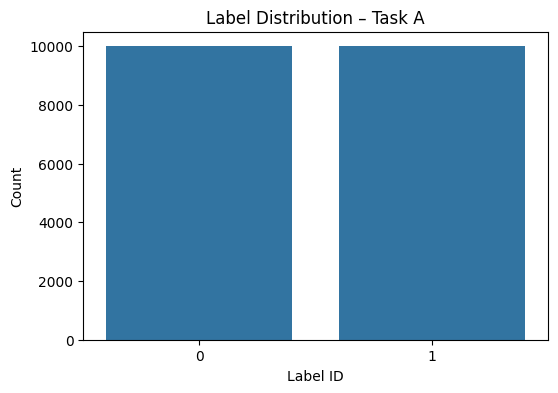

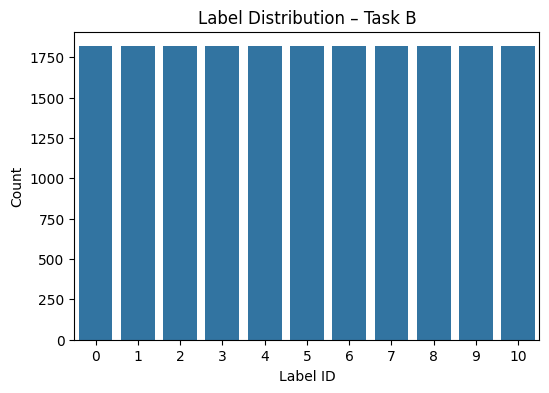

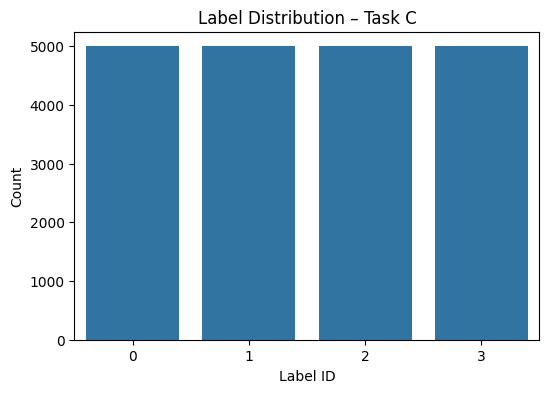

In [21]:
#label distribtion char a, b, c
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE = "/content/semeval2026-task13/data"

tasks = {
    "A": "task_a_train_small.csv",
    "B": "task_b_train_small.csv",
    "C": "task_c_train_small.csv"
}

for t, file in tasks.items():
    df = pd.read_csv(f"{BASE}/{file}")

    plt.figure(figsize=(6,4))
    sns.countplot(x=df["label"])
    plt.title(f"Label Distribution – Task {t}")
    plt.xlabel("Label ID")
    plt.ylabel("Count")
    plt.show()


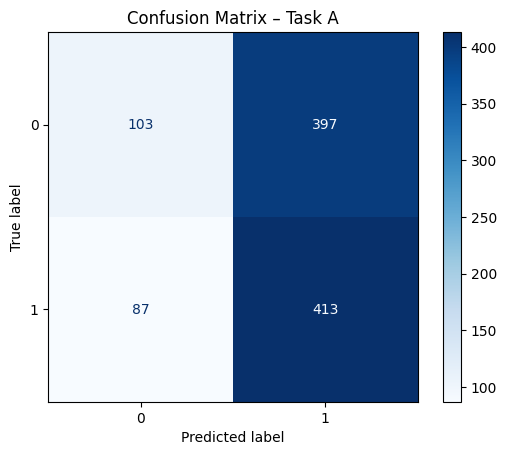

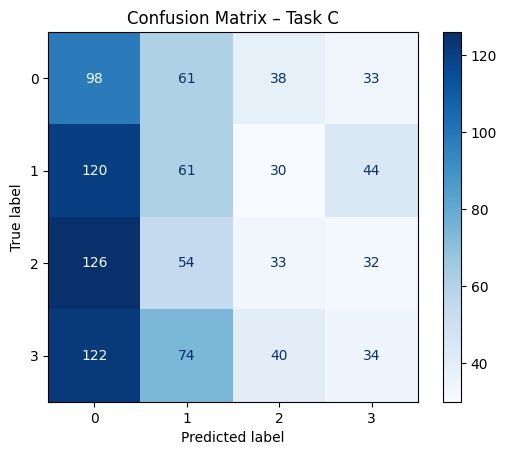

In [22]:
#confusuin matrix for a and c
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load validation ground truth
val_a = pd.read_csv("/content/semeval2026-task13/data/task_a_val_small.csv")

# Load predictions
pred_a = pd.read_csv("/content/semeval2026-task13/predictions_task_a.csv")

# Align (test sample may be smaller — this is only for demonstration)
y_true = val_a["label"][:len(pred_a)]
y_pred = pred_a["pred_label"]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Task A")
plt.show()

# Load validation ground truth
val_c = pd.read_csv("/content/semeval2026-task13/data/task_c_val_small.csv")

# Load predictions
pred_c = pd.read_csv("/content/semeval2026-task13/predictions_task_c.csv")

y_true = val_c["label"][:len(pred_c)]
y_pred = pred_c["pred_label"]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Task C")
plt.show()



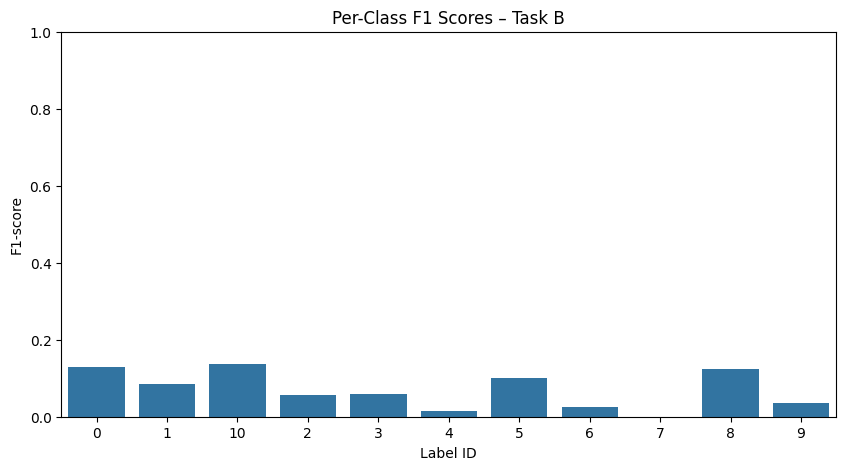

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Load ground truth & predictions
val_b = pd.read_csv("/content/semeval2026-task13/data/task_b_val_small.csv")
pred_b = pd.read_csv("/content/semeval2026-task13/predictions_task_b.csv")

y_true = val_b["label"][:len(pred_b)]
y_pred = pred_b["pred_label"]

# Compute per-class F1
report = classification_report(y_true, y_pred, output_dict=True)

# Extract class F1 scores
labels = sorted([str(int(i)) for i in report.keys() if i.isdigit()])
f1_scores = [report[l]["f1-score"] for l in labels]

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=f1_scores)
plt.title("Per-Class F1 Scores – Task B")
plt.xlabel("Label ID")
plt.ylabel("F1-score")
plt.ylim(0,1)
plt.show()
